In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,normalize 
from sklearn.metrics import confusion_matrix

In [2]:
heart = pd.read_csv("fsv2heart.csv")
heart.dtypes

thalach      int64
oldpeak    float64
ca           int64
cp           int64
thal_3       int64
cp_0         int64
exang        int64
thal_2       int64
slope_2      int64
chol         int64
age          int64
cp_2         int64
slope_1      int64
target       int64
dtype: object

In [3]:
heart.iloc[1:5,:]

,thalach,oldpeak,ca,cp,thal_3,cp_0,exang,thal_2,slope_2,chol,age,cp_2,slope_1,target
1,187,3.5,0,2,0,0,0,1,0,250,37,1,0,1
2,172,1.4,0,1,0,0,0,1,1,204,41,0,0,1
3,178,0.8,0,1,0,0,0,1,1,236,56,0,0,1
4,163,0.6,0,0,0,1,1,1,1,354,57,0,0,1


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
heart = pd.DataFrame(scaler.fit_transform(heart), columns=heart.columns, index=heart.index)

In [5]:
heart.iloc[1:5,:]

,thalach,oldpeak,ca,cp,thal_3,cp_0,exang,thal_2,slope_2,chol,age,cp_2,slope_1,target
1,0.885496,0.564516,0.0,0.666667,0.0,0.0,0.0,1.0,0.0,0.283105,0.166667,1.0,0.0,1.0
2,0.770992,0.225806,0.0,0.333333,0.0,0.0,0.0,1.0,1.0,0.178082,0.250000,0.0,0.0,1.0
3,0.816794,0.129032,0.0,0.333333,0.0,0.0,0.0,1.0,1.0,0.251142,0.562500,0.0,0.0,1.0
4,0.702290,0.096774,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,0.520548,0.583333,0.0,0.0,1.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', 1), heart['target'],random_state = 0,test_size = 0.2)

In [7]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test,y_test)

0.8852459016393442

In [8]:
temp = 0
tempi = 0
df = pd.DataFrame(columns = ["k",'score'])
for i in range (1,11): 
 model=KNeighborsClassifier(n_neighbors=i)
 cv_r2_scores_rf = cross_val_score(model,heart.drop('target', 1),heart['target'], cv=10)
 mean = np.mean(cv_r2_scores_rf)
 df.loc[i] = i
 df.loc[i,'score'] = mean
 if  mean > temp:
  temp = mean
  tempi = i 
print ("biggest success:",temp,", k =",tempi)
    

biggest success: 0.84789766407119 , k = 7


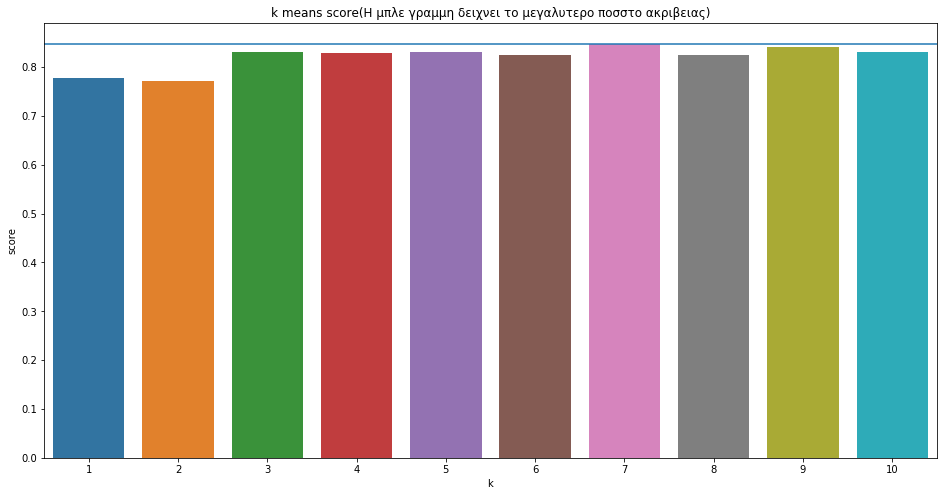

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(y=df.score,x=df.k)
plt.title("k means score(Η μπλε γραμμη δειχνει το μεγαλυτερο ποσστο ακριβειας)")
plt.axhline(0.84789766407119,0,5)

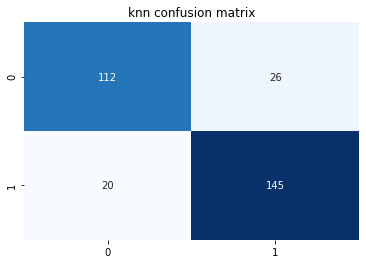

In [13]:
model = KNeighborsClassifier(n_neighbors=7)
crossmodel = cross_val_predict(model,heart.drop('target', 1),heart['target'],cv=10)
conf_mat = confusion_matrix(heart['target'],crossmodel)
plt.title("knn confusion matrix")
sns.heatmap(conf_mat,annot=True,cmap="Blues",fmt="d",cbar=False)